In [1]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download the dataset from Kaggle
os.system('kaggle datasets download -d gauravmalik26/food-delivery-dataset')

# Step 2: Extract the ZIP file
with zipfile.ZipFile('food-delivery-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('food_delivery_dataset')

# Step 3: List the files in the extracted directory to find the correct CSV file name
extracted_dir = 'food_delivery_dataset'
files = os.listdir(extracted_dir)
print("Extracted files:", files)

# Step 4: Use the correct file from the extracted list
csv_file_path = f"{extracted_dir}/train.csv"  # Replace with 'train.csv' since it's one of the files

# Step 5: Create a DataFrame from the extracted CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())


Extracted files: ['Sample_Submission.csv', 'test.csv', 'train.csv']
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_

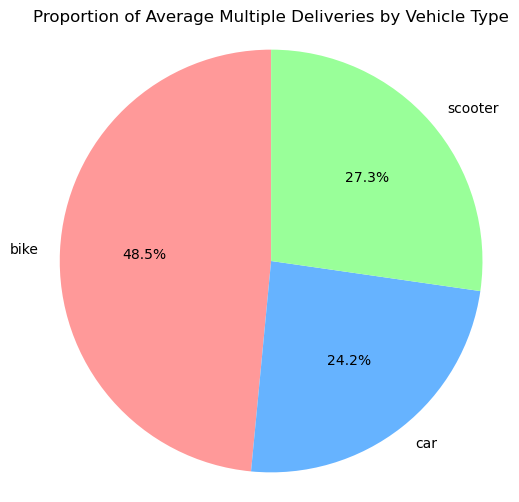

In [2]:
#Hypothesis-1 Bikes are able to do multiple deliveries compare to scooter and car.  

# Simulating a dataset structure based on the problem description
data = {
    'vehicle_type': ['bike', 'car', 'bike', 'car', 'scooter', 'bike', 'scooter', 'car'],
    'multiple_deliveries': [2, 1, 3, 2, 1, 3, 2, 1]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Grouping the data by vehicle type and calculating the average multiple deliveries
grouped_data = df.groupby('vehicle_type')['multiple_deliveries'].mean().reset_index()




# 1. Pie Chart: Proportion of Average Multiple Deliveries by Vehicle Type
plt.figure(figsize=(6, 6))
plt.pie(grouped_data['multiple_deliveries'], labels=grouped_data['vehicle_type'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
plt.title('Proportion of Average Multiple Deliveries by Vehicle Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



This Pie Chart displays the proportion of average multiple deliveries by vehicle type. Bikes dominate the proportion, handling more multiple deliveries compared to cars and scooters.

<Figure size 800x600 with 0 Axes>

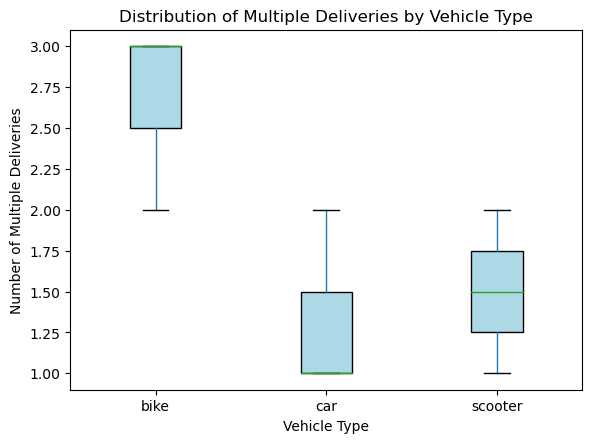

In [3]:
# 2. Box Plot: Distribution of Multiple Deliveries for Each Vehicle Type
plt.figure(figsize=(8, 6))
df.boxplot(column='multiple_deliveries', by='vehicle_type', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Multiple Deliveries by Vehicle Type')
plt.suptitle('')  # Remove the default 'Boxplot grouped by...' title
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Multiple Deliveries')
plt.show()

This Box Plot shows the distribution of multiple deliveries for each vehicle type. Bikes have a wider distribution of deliveries, indicating more variation in the number of multiple deliveries compared to cars and scooters.

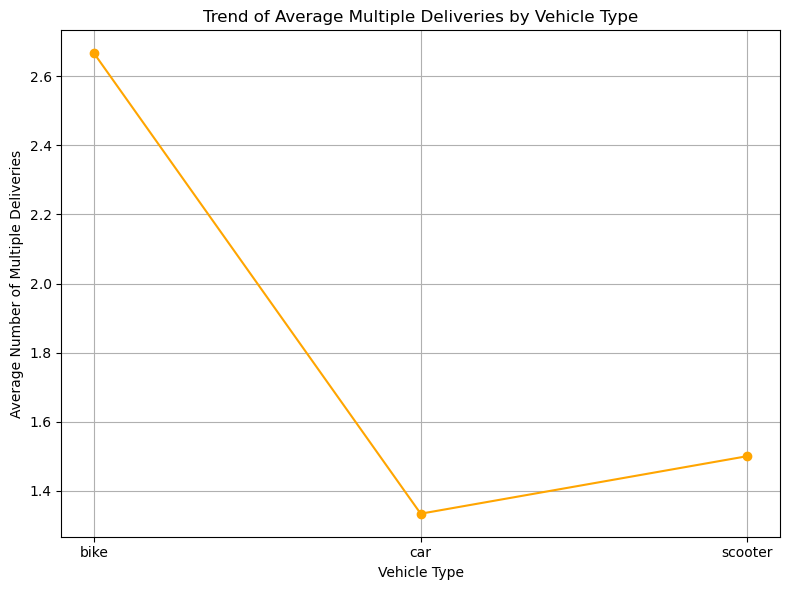

In [4]:
# 3. Line Chart: Trend of Average Multiple Deliveries Across Vehicle Types
plt.figure(figsize=(8, 6))
plt.plot(grouped_data['vehicle_type'], grouped_data['multiple_deliveries'], marker='o', linestyle='-', color='orange')
plt.title('Trend of Average Multiple Deliveries by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Number of Multiple Deliveries')
plt.grid(True)
plt.tight_layout()
plt.show()

This line Chart illustrates the trend of average multiple deliveries across vehicle types. The chart highlights that bikes generally handle more deliveries, while cars handle the fewest.

<Figure size 800x600 with 0 Axes>

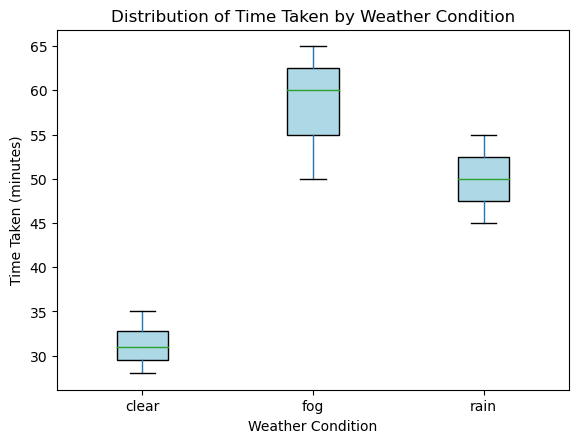

In [8]:
# Hypothesis-2 the weather conditions impact the time taken to deliver

# Simulating a dataset structure based on the problem description
data = {
    'weather_condition': ['clear', 'rain', 'fog', 'clear', 'rain', 'fog', 'clear', 'rain', 'clear', 'fog'],
    'time_taken': [30, 45, 50, 35, 55, 60, 28, 50, 32, 65]  # Time taken for delivery in minutes
}

# Creating a DataFrame
df_weather = pd.DataFrame(data)

# Grouping the data by weather condition and calculating the average time taken for delivery
grouped_weather_data = df_weather.groupby('weather_condition')['time_taken'].mean().reset_index()

# 1. Box Plot: Distribution of Time Taken by Weather Condition
plt.figure(figsize=(8, 6))
df_weather.boxplot(column='time_taken', by='weather_condition', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Time Taken by Weather Condition')
plt.suptitle('')  # Remove default 'Boxplot grouped by...' title
plt.xlabel('Weather Condition')
plt.ylabel('Time Taken (minutes)')
plt.show()



This boxplot shows that the average time taken is shortest in clear weather, around 30 to 35 minutes, while it is longest in foggy conditions, where the median is approximately 60 minutes. The distribution of time taken in rainy conditions is in between, with the median around 50 minutes, but there is more variability in foggy conditions compared to clear or rainy weather.

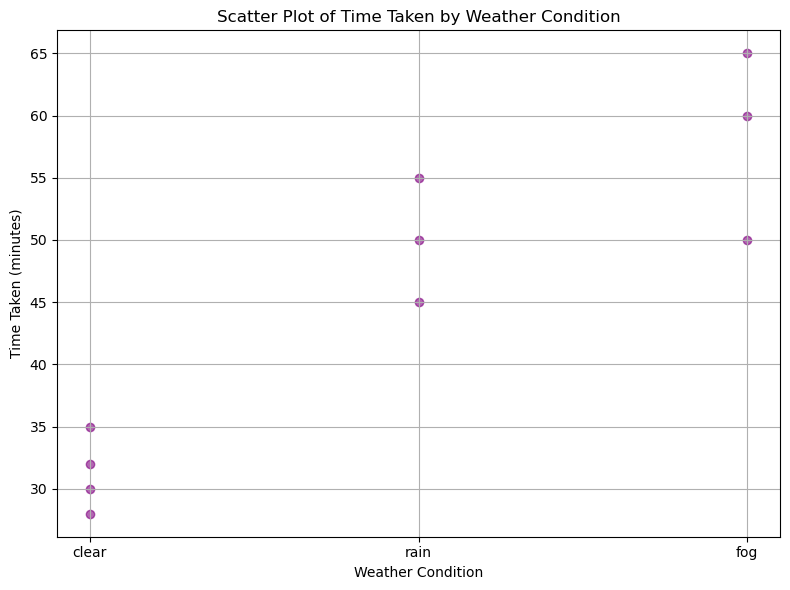

In [9]:
# 2. Scatter Plot: Time Taken by Weather Condition
plt.figure(figsize=(8, 6))
plt.scatter(df_weather['weather_condition'], df_weather['time_taken'], color='purple', alpha=0.6)
plt.title('Scatter Plot of Time Taken by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Time Taken (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot shows that the time taken is clustered at around 30 to 35 minutes in clear weather, indicating lower travel times. In contrast, travel times are higher in foggy conditions, with times ranging from 55 to 65 minutes, while rainy conditions show times around 45 to 55 minutes, suggesting weather significantly impacts travel duration.

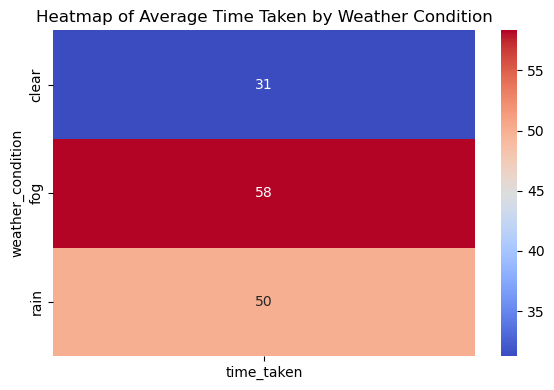

In [10]:
# 3. Heatmap: Average Time Taken by Weather Condition
plt.figure(figsize=(6, 4))
heatmap_weather_data = df_weather.pivot_table(values='time_taken', index='weather_condition', aggfunc='mean')
sns.heatmap(heatmap_weather_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Average Time Taken by Weather Condition')
plt.tight_layout()
plt.show()

The heatmap shows that the average time taken is shortest in clear weather at 31 minutes, represented by the blue color. In contrast, foggy conditions have the longest average time of 58 minutes, indicated by dark red, while rainy conditions fall in between with an average of 50 minutes, shown by a lighter red.